In [33]:
from dataclasses import dataclass
import pandas as pd



@dataclass
class IngestDataFromTlc:
    year: int = None
    month: str = None
    colour: str = None
    data: pd.DataFrame = None


    def read_taxi_data_from_tlc(self, year, month, colour) -> pd.DataFrame:
        """Downloads data from nyc taxi website and returns a pandas dataframe"""
        dataset_file = f"tripdata_{year}-{month}"
        dataset_url = f"https://d37ci6vzurychx.cloudfront.net/trip-data/{colour}_{dataset_file}.parquet"
        self.data = pd.read_parquet(dataset_url)
        return self.data
    

    # Create target varuable
    def create_target_variable(self):
        self.data["trip_duration"] = self.data["tpep_dropoff_datetime"] - self.data["tpep_pickup_datetime"]
        self.data["trip_duration"] = self.data["trip_duration"].dt.total_seconds()
        return self.data
    
    def impute_missing_values(self):
        cols = ["passenger_count"]
        for col in cols:
            self.data[col] = self.data[col].fillna(self.data[col].median())
        return self.data
    
    def remove_outliers(self):
        self.data = self.data[self.data["trip_duration"] < 50000]
        return self.data

In [34]:
ingest = IngestDataFromTlc()
ingest.read_taxi_data_from_tlc(2019, "01", "yellow")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,None
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,None
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,N,236,236,1,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,None
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,None
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,N,193,193,2,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696612,2,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,None,142,95,0,0.00,2.75,0.0,0.00,5.76,0.3,0.00,NaN,None
7696613,2,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,None,48,213,0,48.80,5.50,0.0,0.00,0.00,0.3,54.60,NaN,None
7696614,2,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,None,159,246,0,51.05,2.75,0.5,0.00,0.00,0.3,54.60,NaN,None
7696615,2,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,None,265,265,0,0.00,0.00,0.5,9.82,0.00,0.3,0.00,NaN,None


In [35]:
ingest.create_target_variable()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,None,400.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,None,1152.0
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,N,236,236,1,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,None,250.0
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,None,200.0
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,N,193,193,2,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,None,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696612,2,2019-01-31 23:37:20,2019-02-01 00:10:43,NaN,10.24,NaN,None,142,95,0,0.00,2.75,0.0,0.00,5.76,0.3,0.00,NaN,None,2003.0
7696613,2,2019-01-31 23:28:00,2019-01-31 23:50:50,NaN,12.43,NaN,None,48,213,0,48.80,5.50,0.0,0.00,0.00,0.3,54.60,NaN,None,1370.0
7696614,2,2019-01-31 23:11:00,2019-01-31 23:46:00,NaN,9.14,NaN,None,159,246,0,51.05,2.75,0.5,0.00,0.00,0.3,54.60,NaN,None,2100.0
7696615,2,2019-01-31 23:03:00,2019-01-31 23:14:00,NaN,0.00,NaN,None,265,265,0,0.00,0.00,0.5,9.82,0.00,0.3,0.00,NaN,None,660.0


In [36]:
ingest.impute_missing_values()
ingest.remove_outliers()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,N,151,239,1,7.00,0.50,0.5,1.65,0.00,0.3,9.95,NaN,None,400.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,N,239,246,1,14.00,0.50,0.5,1.00,0.00,0.3,16.30,NaN,None,1152.0
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3.0,0.00,1.0,N,236,236,1,4.50,0.50,0.5,0.00,0.00,0.3,5.80,NaN,None,250.0
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5.0,0.00,1.0,N,193,193,2,3.50,0.50,0.5,0.00,0.00,0.3,7.55,NaN,None,200.0
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5.0,0.00,2.0,N,193,193,2,52.00,0.00,0.5,0.00,0.00,0.3,55.55,NaN,None,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7696612,2,2019-01-31 23:37:20,2019-02-01 00:10:43,1.0,10.24,NaN,None,142,95,0,0.00,2.75,0.0,0.00,5.76,0.3,0.00,NaN,None,2003.0
7696613,2,2019-01-31 23:28:00,2019-01-31 23:50:50,1.0,12.43,NaN,None,48,213,0,48.80,5.50,0.0,0.00,0.00,0.3,54.60,NaN,None,1370.0
7696614,2,2019-01-31 23:11:00,2019-01-31 23:46:00,1.0,9.14,NaN,None,159,246,0,51.05,2.75,0.5,0.00,0.00,0.3,54.60,NaN,None,2100.0
7696615,2,2019-01-31 23:03:00,2019-01-31 23:14:00,1.0,0.00,NaN,None,265,265,0,0.00,0.00,0.5,9.82,0.00,0.3,0.00,NaN,None,660.0


In [40]:
ingest.data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,trip_duration
count,7.676796e+06,7.676796e+06,7.676796e+06,7.648124e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,7.676796e+06,2.804752e+06,7.676796e+06
mean,1.637241e+00,1.564284e+00,2.827025e+00,1.058305e+00,1.654104e+02,1.636429e+02,1.286831e+00,1.251998e+01,3.374100e-01,4.964975e-01,1.820553e+00,3.223378e-01,2.993413e-01,1.580007e+01,3.297974e-05,7.772899e+02
std,5.397804e-01,1.221876e+00,3.770832e+00,6.777284e-01,6.644340e+01,7.040532e+01,4.789476e-01,2.619255e+02,5.313964e-01,5.493913e-02,2.498206e+00,2.029987e+00,1.907437e-02,2.621472e+02,9.080105e-03,2.046410e+03
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-3.620000e+02,-6.000000e+01,-5.000000e-01,-6.350000e+01,-7.000000e+01,-3.000000e-01,-3.628000e+02,0.000000e+00,-5.056830e+06
25%,1.000000e+00,1.000000e+00,9.000000e-01,1.000000e+00,1.270000e+02,1.130000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00,0.000000e+00,3.660000e+02
50%,2.000000e+00,1.000000e+00,1.530000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.400000e+00,0.000000e+00,3.000000e-01,1.130000e+01,0.000000e+00,6.100000e+02
75%,2.000000e+00,2.000000e+00,2.830000e+00,1.000000e+00,2.340000e+02,2.340000e+02,2.000000e+00,1.350000e+01,5.000000e-01,5.000000e-01,2.320000e+00,0.000000e+00,3.000000e-01,1.660000e+01,0.000000e+00,9.950000e+02
max,5.000000e+00,9.000000e+00,8.318000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,6.232599e+05,5.353800e+02,6.080000e+01,7.872500e+02,3.288000e+03,6.000000e-01,6.232617e+05,2.500000e+00,4.981600e+04


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import PredictionErrorDisplay
import matplotlib.pyplot as plt

X_db = ingest.data[["passenger_count", "total_amount"]]


y_db = ingest.data[['trip_duration']]





linear = LinearRegression()



y_pred = cross_val_predict(linear, X_db, y_db, cv=5)


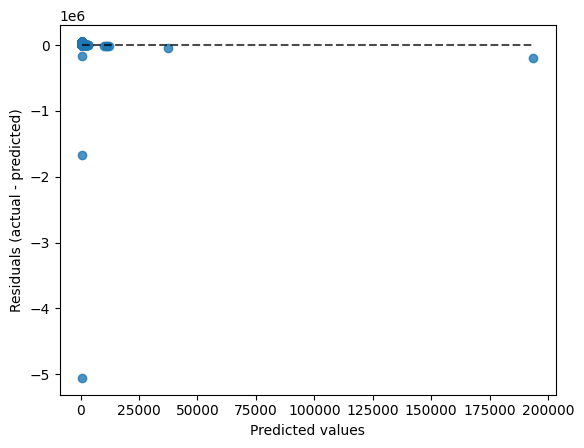

In [38]:
# plot a scatterplot with the predicted values and the true values
disp = PredictionErrorDisplay(y_pred=y_pred, y_true=y_db)
disp.plot()
plt.show()


In [ ]:
pre = PredictionErrorDisplay(y_pred=y_pred, y_true=y_db, )

In [44]:
X_train = ingest.data[["passenger_count", "total_amount"]]
y_train = ingest.data[['trip_duration']]

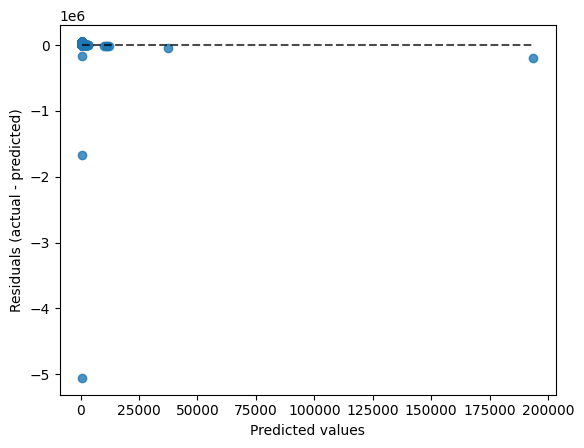

In [50]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(transform_output="pandas")


clf = make_pipeline(
    StandardScaler(), LinearRegression()
)
clf.set_output(transform="pandas")
clf.fit(X_train, y_train)
clf.predict(X_train)

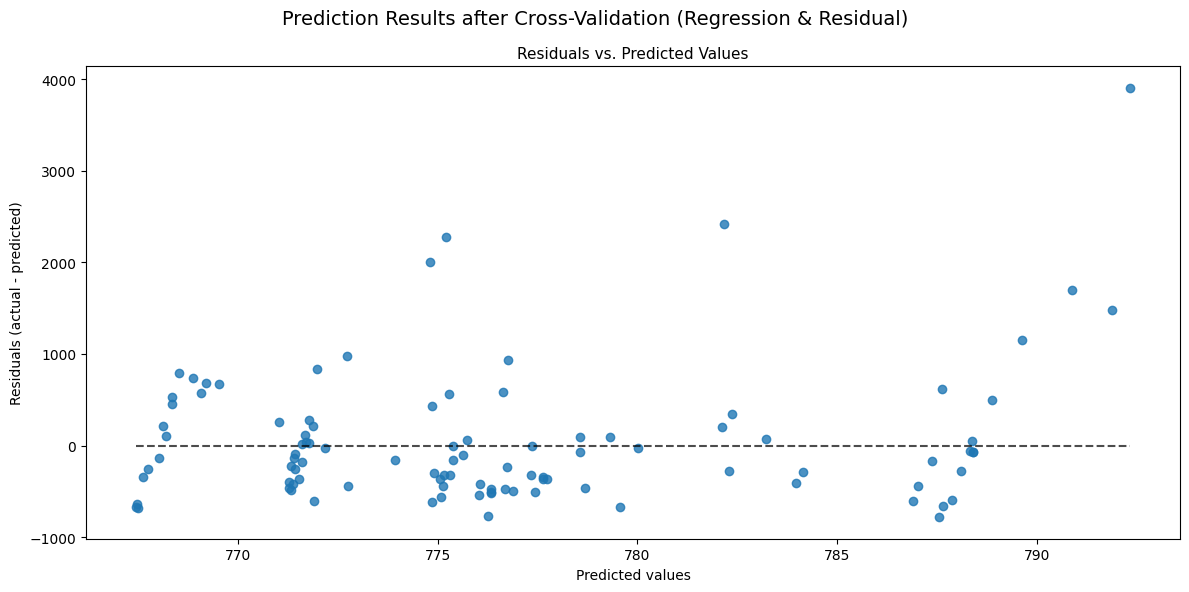

In [64]:
fig, (ax2) = plt.subplots(1, 1, figsize=(12, 6))

PredictionErrorDisplay.from_predictions(y_train, 
                                        y_pred=y_pred, 
                                        kind="residual_vs_predicted", 
                                        subsample=100,
                                        ax = ax2,
                                        random_state=0,)

ax2.set_title("Residuals vs. Predicted Values", fontsize=11)
fig.suptitle("Prediction Results after Cross-Validation (Regression & Residual)", fontsize=14)
plt.tight_layout()
plt.show()

In [62]:
y_pred.any()

True